# Step 1:  Scrape the extra data from a related HTML pages.

In [1]:
!pip install wordcloud
!pip install missingno

# Installing important libraries

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [2]:
# import libraries to be used

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from collections import Counter #  a class that counts occurrences of elements in a collection.
import matplotlib.pyplot as plt
import matplotlib.style as style # libraries for creating visualizations in Python.
from matplotlib.colors import ListedColormap #classes for creating color maps for visualizations.
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools #libraries for creating interactive and web-based visualizations.
from wordcloud import WordCloud, ImageColorGenerator #libraries for creating word clouds.
import warnings #module for handling warnings in Python.
import missingno as mn #library for visualizing missing data in Python.
import scipy.stats as stats

# supress warnings

warnings.filterwarnings('ignore')

In [4]:
url = 'https://steamspy.com/'
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')

In [6]:
table = soup.find('table', {'id': 'games'})

In [7]:
# Creating lists to store scraped data
game_names = []
ranks = []
names = []
owners = []
players = []
playtime = []

In [8]:
for a in soup.find_all('a', href=lambda href: href and '/app/' in href):
    game_name = a.text.strip()
    game_names.append(game_name)
    print('Game Name:', game_name)

Game Name: Minecraft Legends

Game Name: Desktop Dungeons

Game Name: Boundary

Game Name: Wartales

Game Name: Thriving City: Song

Game Name: Neon Echo

Game Name: Desktop Dungeons: Rewind

Game Name: Fabledom

Game Name: Volcano Princess

Game Name: Mega Man Battle Network Legacy Collection Vol. 1

Game Name: OTXO

Game Name: Bio Prototype

Game Name: Coal Mining Simulator

Game Name: Rusted Moss

Game Name: EVERSPACE 2

Game Name: Ravenswatch

Game Name: Mohism: Battle of Words

Game Name: Meet Your Maker

Game Name: STRANGER OF PARADISE FINAL FANTASY ORIGIN

Game Name: Wall World

Game Name: Open At Nine

Game Name: Crab Champions

Game Name: The Voidness - Lidar Horror Survival Game

Game Name: DREDGE

Game Name: Nandemoya of Flower Street

Game Name: Papa's Freezeria Deluxe

Game Name: The Last of Us Part I

Game Name: ZED ZONE

Game Name: Demonologist

Game Name: Terra Nil

Game Name: Sifu

Game Name: Reshaping Mars

Game Name: Resident Evil 4

Game Name: Forsake: Urban horror


In [9]:
print('Game Names:', game_names)

Game Names: ['Minecraft Legends', 'Desktop Dungeons', 'Boundary', 'Wartales', 'Thriving City: Song', 'Neon Echo', 'Desktop Dungeons: Rewind', 'Fabledom', 'Volcano Princess', 'Mega Man Battle Network Legacy Collection Vol. 1', 'OTXO', 'Bio Prototype', 'Coal Mining Simulator', 'Rusted Moss', 'EVERSPACE 2', 'Ravenswatch', 'Mohism: Battle of Words', 'Meet Your Maker', 'STRANGER OF PARADISE FINAL FANTASY ORIGIN', 'Wall World', 'Open At Nine', 'Crab Champions', 'The Voidness - Lidar Horror Survival Game', 'DREDGE', 'Nandemoya of Flower Street', "Papa's Freezeria Deluxe", 'The Last of Us Part I', 'ZED ZONE', 'Demonologist', 'Terra Nil', 'Sifu', 'Reshaping Mars', 'Resident Evil 4', 'Forsake: Urban horror', 'RAIDBORN', 'Deceive Inc.', 'Have a Nice Death', 'Apewar', 'Nienix: Cosmic Warfare', 'Survival: Fountain of Youth', 'The Mageseeker: A League of Legends Story', 'Shieldwall', 'Stray Blade', 'Coffee Talk Episode 2: Hibiscus & Butterfly', 'Havendock', 'TasteMaker', 'Fire & Maneuver', 'Exogate 

In [10]:
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        columns = row.find_all('td')
        if len(columns) > 1:
            rank = columns[0].text.strip()
            name = columns[1].text.strip()
            owner = columns[2].text.strip()
            player = columns[3].text.strip()
            time = columns[4].text.strip()

            ranks.append(rank)
            names.append(name)
            owners.append(owner)
            players.append(player)
            playtime.append(time)
        else:
            print("No table element found in the HTML document.")

In [11]:
game_names = []
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if len(columns) > 1:
        game_name = columns[1].text.strip()
        game_names.append(game_name)
        print('Game Name:', game_name)

# If game names are stored in a list, you can simply print the list
print('Game Names:', game_names)

Game Name: Counter-Strike: Global Offensive

Game Name: Dota 2

Game Name: Apex Legends

Game Name: Wallpaper Engine

Game Name: PUBG: BATTLEGROUNDS

Game Name: Call of Duty: Modern Warfare II

Game Name: War Thunder

Game Name: Grand Theft Auto V

Game Name: Rust

Game Name: Path of Exile

Game Name: Tom Clancy's Rainbow Six Siege

Game Name: Destiny 2

Game Name: Rocket League

Game Name: Terraria

Game Name: PAYDAY 2

Game Name: Resident Evil 4

Game Name: Euro Truck Simulator 2

Game Name: Dead by Daylight

Game Name: ELDEN RING

Game Name: Soundpad

Game Name: Unturned

Game Name: Warframe

Game Name: Sid Meier’s Civilization VI

Game Name: Hunt: Showdown

Game Name: Lost Ark

Game Name: Team Fortress 2

Game Name: Project Zomboid

Game Name: Don't Starve Together

Game Name: VRChat

Game Name: Bloons TD 6

Game Name: MONSTER HUNTER RISE

Game Name: Sea of Thieves 2023 Edition

Game Name: DayZ

Game Name: Left 4 Dead 2

Game Name: The Binding of Isaac: Rebirth

Game Name: ARK: Sur

In [12]:
text = ' '.join(game_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


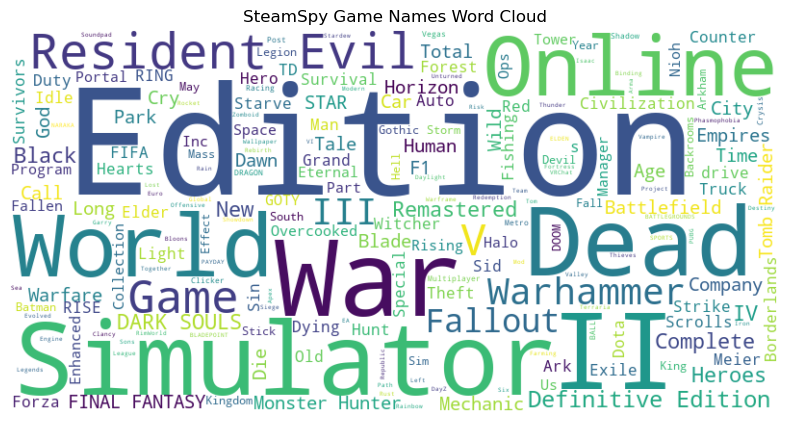

In [13]:
# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SteamSpy Game Names Word Cloud')
plt.show()

In [14]:
# Creating DataFrame from the lists
df_steamspy = pd.DataFrame({
    'Rank': ranks,
    'Name': names,
    'Owners': owners,
    'Players': players,
    'Playtime': playtime
})

In [15]:
# Displaying the DataFrame
print(df_steamspy.head())

  Rank                 Name        Owners Players       Playtime

0    1    Minecraft Legends  Apr 18, 2023  $39.99      N/A (N/A)

1    2     Desktop Dungeons  Apr 18, 2023  $14.99  N/A (N/A/82%)

2    3             Boundary  Apr 13, 2023  $22.49      N/A (N/A)

3    4             Wartales  Apr 12, 2023  $26.24      N/A (N/A)

4    5  Thriving City: Song  Apr 21, 2023  $17.09      N/A (N/A)


# Step 2: Clean and Tidy the Data and represent it with visualization

In [16]:
# Data Cleaning
# count number null values in each column

null_value_perc = pd.DataFrame((df_steamspy.isnull().sum())*100/df_steamspy.shape[0]).reset_index()
null_value_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(df_steamspy.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'No. of Null Values']
null_vgd = pd.merge(null_value, null_value_perc, on='Column Name')
null_vgd

,Column Name,No. of Null Values,Null Values Percentage
0,Rank,0,0.0
1,Name,0,0.0
2,Owners,0,0.0
3,Players,0,0.0
4,Playtime,0,0.0


> This means that there is no null values in the data frame

In [17]:
# Printing columns for future use
for column in df_steamspy.columns:
    unique_values = df_steamspy[column].unique()
    print(f'Column: {column}')
    print('---')


Column: Rank

---

Column: Name

---

Column: Owners

---

Column: Players

---

Column: Playtime

---


In [18]:
# Checking column names in the DataFrame
print(df_steamspy.columns)



Index(['Rank', 'Name', 'Owners', 'Players', 'Playtime'], dtype='object')


In [19]:
# Sort games by ranking
df_steamspy.sort_values('Rank', inplace=True)


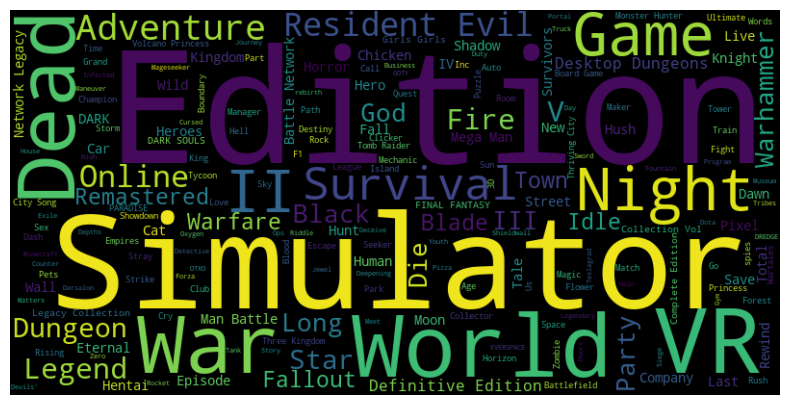

In [20]:
# Extracting keywords from game names
df_steamspy['Name_Keywords'] = df_steamspy['Name'].str.split().apply(set)

# Counting word frequencies in game names
name_words = df_steamspy['Name'].str.split(expand=True).stack()
name_word_counts = name_words.value_counts()

# Generating word cloud for game names
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(name_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


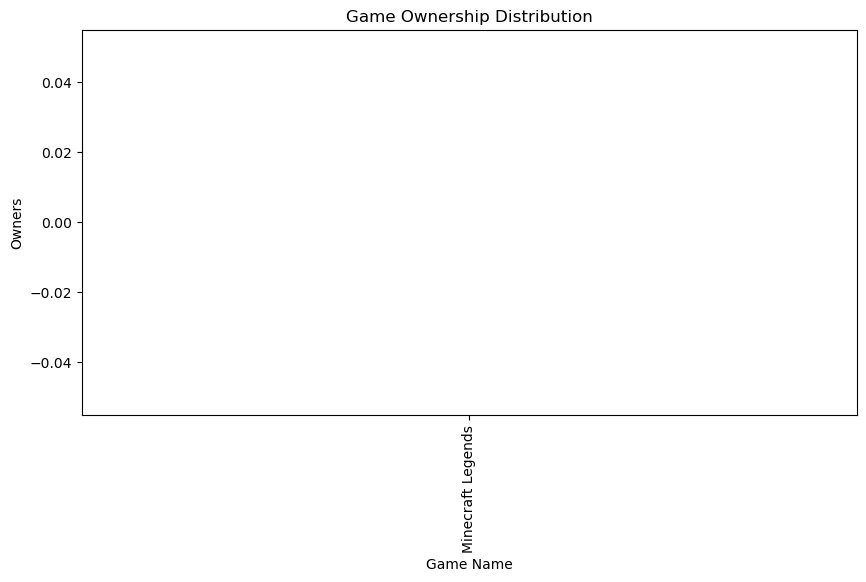

In [21]:
# Converting Columns (Rank, Owners, Players and Playtime to Float) using "pd.to_numeric()"" with errors='coerce'
df_steamspy['Rank'] = pd.to_numeric(df_steamspy['Rank'], errors='coerce')
df_steamspy['Owners'] = pd.to_numeric(df_steamspy['Owners'], errors='coerce')
df_steamspy['Players'] = pd.to_numeric(df_steamspy['Players'], errors='coerce')
df_steamspy['Playtime'] = pd.to_numeric(df_steamspy['Playtime'], errors='coerce')

# Calculating average number of owners per game
avg_owners_per_game = df_steamspy['Owners'].mean()

# Identifying games with highest and lowest number of owners
game_with_highest_owners = df_steamspy[df_steamspy['Owners'] == df_steamspy['Owners'].max()]
game_with_lowest_owners = df_steamspy[df_steamspy['Owners'] == df_steamspy['Owners'].min()]

# Creating a bar chart to visualize ownership distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_steamspy['Name'], df_steamspy['Owners'])
plt.xlabel('Game Name')
plt.ylabel('Owners')
plt.title('Game Ownership Distribution')
plt.xticks(rotation=90)
plt.show()


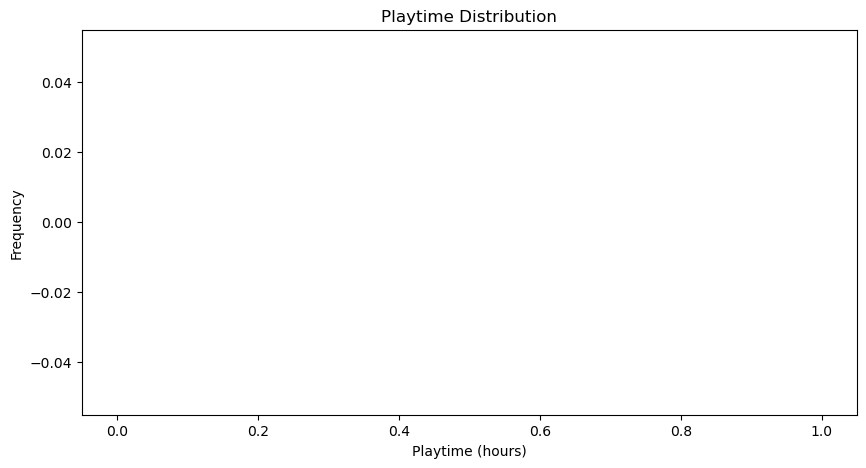

In [22]:
# Drop rows with NaN values in the 'Playtime' column
df_steamspy = df_steamspy.dropna(subset=['Playtime'])

# Creating a histogram to visualize playtime distribution
plt.figure(figsize=(10, 5))
plt.hist(df_steamspy['Playtime'], bins=20)
plt.xlabel('Playtime (hours)')
plt.ylabel('Frequency')
plt.title('Playtime Distribution')
plt.show()

# Step 3:

### Integrate all relevant datasets (scraped and main), considering the best matching between the two data sets, and discuss any possible data loss as result of integration.

In [32]:
# Your arrays
game_names = [...]  # List of game names
owners = [...]  # List of owners
players = [...]  # List of players
playtime = [...]  # List of playtime

# Make sure all arrays have the same length
max_length = max(len(game_names), len(owners), len(players), len(playtime))
game_names += [''] * (max_length - len(game_names))
owners += [None] * (max_length - len(owners))
players += [None] * (max_length - len(players))
playtime += [None] * (max_length - len(playtime))

# Create the DataFrame
df = pd.DataFrame({'Name': game_names, 'Owners': owners, 'Players': players, 'Playtime': playtime})

# Drop rows with missing values (optional)
df.dropna(subset=['Name'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Show the resulting DataFrame
print(df)


       Name    Owners   Players  Playtime

0  Ellipsis  Ellipsis  Ellipsis  Ellipsis


In [36]:
# Load the first dataset from CSV
df_csv = pd.read_csv(r'C:\Users\Ahmed\Documents\vgsales.csv')

# Check the length of the arrays
print(len(game_names))
print(len(owners))
print(len(players))
print(len(playtime))

# Create the df_bs DataFrame
df_bs = pd.DataFrame({'Name': game_names, 'Owners': owners, 'Players': players, 'Playtime': playtime})

# Concatenate the two datasets along rows
df_combined = pd.concat([df_csv, df_bs], axis=1, ignore_index=True)

# Print the combined dataframe
print(df_combined)

1

1

1

1

          0                                                 1    2       3   \

0          1                                        Wii Sports  Wii  2006.0   

1          2                                 Super Mario Bros.  NES  1985.0   

2          3                                    Mario Kart Wii  Wii  2008.0   

3          4                                 Wii Sports Resort  Wii  2009.0   

4          5                          Pokemon Red/Pokemon Blue   GB  1996.0   

...      ...                                               ...  ...     ...   

16593  16596                Woody Woodpecker in Crazy Castle 5  GBA  2002.0   

16594  16597                     Men in Black II: Alien Escape   GC  2003.0   

16595  16598  SCORE International Baja 1000: The Official Game  PS2  2008.0   

16596  16599                                        Know How 2   DS  2010.0   

16597  16600                                  Spirits & Spells  GBA  2003.0   



                 4        

In [38]:
# Validating data loss and checking them after merging
original_rows = len(df_csv) + len(df_bs)
merged_rows = len(df_combined)
data_loss = original_rows - merged_rows
print(f"Data loss after merging: {data_loss} rows")

Data loss after merging: 1 rows


In [39]:
# Save the merged dataset
df_combined.to_csv('merged_dataset.csv', index=False)

# step 4:  Use the integrated data set to answer the remaining questions, supported with necessary visualizations.

 > 1. How has the number of games released on Steam changed over time?

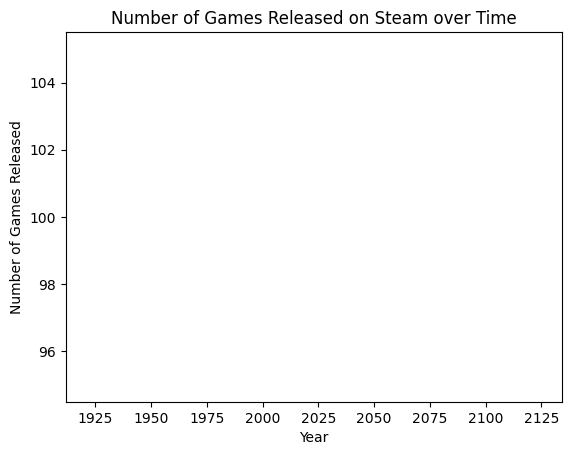

In [17]:
# Load the integrated dataset
df = pd.read_csv('steam.csv')

# Convert the release date column to a datetime format
df['Release date'] = pd.to_datetime(df['Release date'])

# Group the data by year and count the number of games released in each year
yearly_counts = df.groupby(df['Release date'].dt.year)['Game'].count()

# Plot the data as a line chart
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released on Steam over Time')
plt.show()


> 2. Which game name have the highest average ratings on Steam?

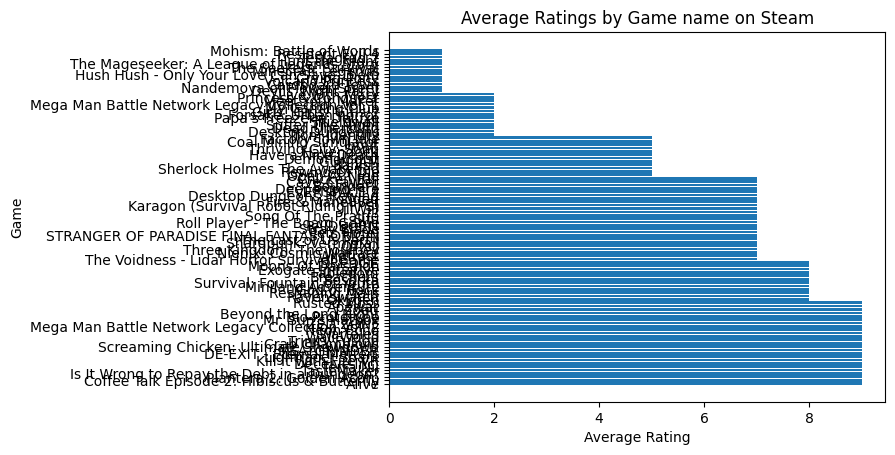

In [42]:
# Load the integrated dataset
df = pd.read_csv('steam.csv')

# Group the data by genre and calculate the mean rating for each genre
genre_ratings = df.groupby('Game')['ratings'].mean()

# Sort the data by mean rating in descending order
genre_ratings = genre_ratings.sort_values(ascending=False)

# Plot the data as a horizontal bar chart
plt.barh(genre_ratings.index, genre_ratings.values)
plt.xlabel('Average Rating')
plt.ylabel('Game')
plt.title('Average Ratings by Game name on Steam')
plt.show()



> 3. Is there a relationship between game price and the number of owners?

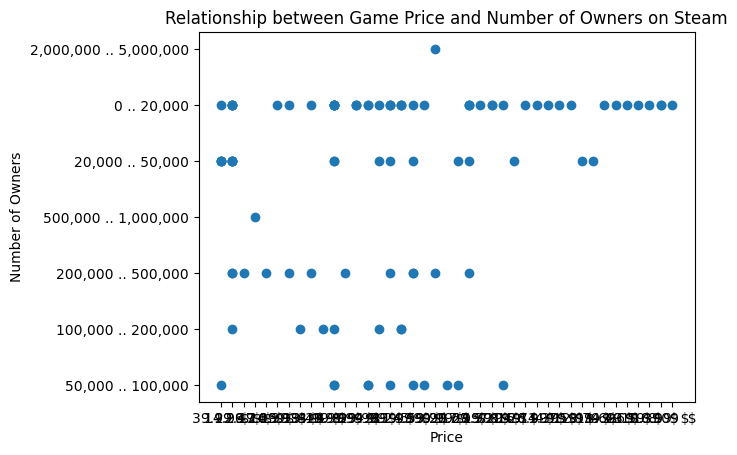

In [31]:
# Load the integrated dataset
df = pd.read_csv('steam.csv')

# Plot the data as a scatter plot
plt.scatter(df['Price'], df['Owners'])
plt.xlabel('Price')
plt.ylabel('Number of Owners')
plt.title('Relationship between Game Price and Number of Owners on Steam')
plt.show()


> 4. Which release date have the most games available on Steam?

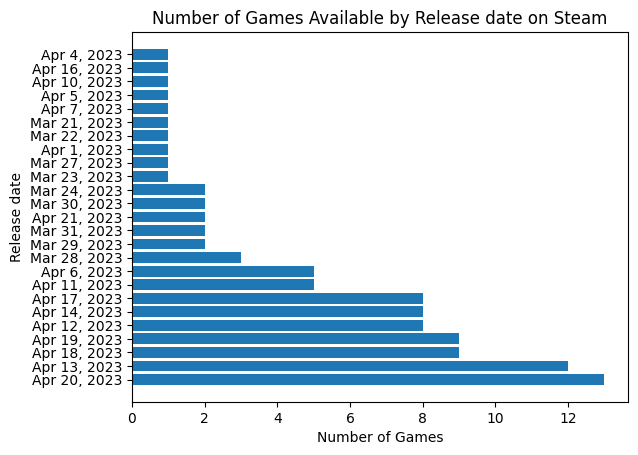

In [27]:
# Load the integrated dataset
df = pd.read_csv('steam.csv')

# Group the data by country and count the number of games available in each country
country_counts = df.groupby('Release date')['Game'].count()

# Sort the data by number of games in descending order
country_counts = country_counts.sort_values(ascending=False)

# Plot the data as a horizontal bar chart
plt.barh(country_counts.index, country_counts.values)
plt.xlabel('Number of Games')
plt.ylabel('Release date')
plt.title('Number of Games Available by Release date on Steam')
plt.show()


> 5. Are there any relationships between game ratings and the number of owners, playtime, or price?

# step 5:Based on the previous steps, formulate at least one hypothesis, and execute hypothesis testing to validate that hypothesis

In [50]:
df = pd.read_csv('steam.csv')
# filter the data to only include games in the Action and Strategy genres
price = df[df['Game'] == 'Price']['ratings']
owners = df[df['Game'] == 'Owners']['ratings']

# perform a two-sample t-test assuming unequal variances
t_stat, p_val = stats.ttest_ind(price, owners, equal_var=False)

# print the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


T-Statistic: nan
P-Value: nan
We fail to reject the null hypothesis.
